# DEFINICION DE KPI

Un Key Performance Indicator (KPI) es un indicador clave de rendimiento que proporciona información cuantificable sobre diversos aspectos del desempeño de una organización, un proceso o una actividad. Los KPIs diseñadas para medir el progreso hacia objetivos estratégicos y ayudar en la toma de decisiones informadas. Están vinculados directamente a los objetivos y metas de la entidad, proporcionando una medida clara y tangible del rendimiento.

## Importaciones

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_accidentes_homicidios = pd.read_csv("Dataset/df_hechos_victimas_clean_t.csv")
df_accidentes_homicidios.head()

,idHecho,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,TIPO_DE_CALLE,COMUNA,Longitud,Latitud,VICTIMA_x,ACUSADO,ROL,SEXO,semestre,dia_semana_espanol,Rango Etario
0,2016-0001,1,2016-01-01,2016,1,1,2023-12-05 04:00:00,4,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,1,Viernes,Adulto Joven
1,2016-0002,1,2016-01-02,2016,1,2,2023-12-05 01:15:00,1,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,1,Sábado,Anciano
2,2016-0003,1,2016-01-03,2016,1,3,2023-12-05 07:00:00,7,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,1,Domingo,Adulto
3,2016-0004,1,2016-01-10,2016,1,10,2023-12-05 00:00:00,0,avenida,8,-58.465039,-34.680930,moto,sd,conductor,masculino,1,Domingo,Adulto Joven
4,2016-0005,1,2016-01-21,2016,1,21,2023-12-05 05:20:00,5,avenida,1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,1,Jueves,Adulto


Se extrajo de la pagina con url **https://www.estadisticaciudad.gob.ar/eyc/?p=29329** la cual nos brinda en xls la informacion de la poblacion, de la cual sacamos los datos necesarios y la volvemos a csv

In [5]:

# Leemos el csv de la poblacion
df_poblacion = pd.read_csv("Dataset/CABA1040.csv", delimiter=';', skip_blank_lines=True)
# Eliminamos las filas nulas por el hecho de que se generan filas con nan por la composicion del archivo
df_poblacion = df_poblacion.dropna()
# Nos devuelve con punto decimal y convertiremos a entero
df_poblacion = df_poblacion.astype(int)
# Resetear el índice
df_poblacion = df_poblacion.reset_index(drop=True)
df_poblacion

,Anio,Poblacion
0,2016,3059122
1,2017,3063728
2,2018,3068043
3,2019,3072029
4,2020,3075646
5,2021,3078836


Merge entre tablas para tener un solo dataframe con la poblacion

In [6]:
# Realizar el merge basado en las claves con nombres diferentes
df_homicidios_poblacion = pd.merge(df_accidentes_homicidios, df_poblacion, left_on='AAAA_x', right_on='Anio', how='inner')
df_homicidios_poblacion.head()

,idHecho,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,TIPO_DE_CALLE,COMUNA,...,Latitud,VICTIMA_x,ACUSADO,ROL,SEXO,semestre,dia_semana_espanol,Rango Etario,Anio,Poblacion
0,2016-0001,1,2016-01-01,2016,1,1,2023-12-05 04:00:00,4,avenida,8,...,-34.687570,moto,auto,conductor,masculino,1,Viernes,Adulto Joven,2016,3059122
1,2016-0002,1,2016-01-02,2016,1,2,2023-12-05 01:15:00,1,gral paz,9,...,-34.669777,auto,pasajeros,conductor,masculino,1,Sábado,Anciano,2016,3059122
2,2016-0003,1,2016-01-03,2016,1,3,2023-12-05 07:00:00,7,avenida,1,...,-34.631894,moto,auto,conductor,masculino,1,Domingo,Adulto,2016,3059122
3,2016-0004,1,2016-01-10,2016,1,10,2023-12-05 00:00:00,0,avenida,8,...,-34.680930,moto,sd,conductor,masculino,1,Domingo,Adulto Joven,2016,3059122
4,2016-0005,1,2016-01-21,2016,1,21,2023-12-05 05:20:00,5,avenida,1,...,-34.622466,moto,pasajeros,conductor,masculino,1,Jueves,Adulto,2016,3059122


## KPI Nro 1

### Reducción del 10% en la tasa de homicidios en siniestros viales en CABA en comparación con el semestre anterior

Realizaremos primero un groupby para poder tener los datos acumulados

In [7]:
# Realizar groupby por Anio y Semestre y sumar N_VICTIMAS
df_anio_semestre = df_homicidios_poblacion.groupby(['Anio', 'semestre']).agg({'N_VICTIMAS': 'sum', 'Poblacion': 'first'}).reset_index()
df_anio_semestre

,Anio,semestre,N_VICTIMAS,Poblacion
0,2016,1,65,3059122
1,2016,2,81,3059122
2,2017,1,69,3063728
3,2017,2,71,3063728
4,2018,1,70,3068043
5,2018,2,79,3068043
6,2019,1,57,3072029
7,2019,2,47,3072029
8,2020,1,31,3075646
9,2020,2,50,3075646


CAlcularemos la tasa de victimas fatales por cada 100000 personas la cual es **tasa = (victimas/poblacion)*100000**

In [8]:
df_anio_semestre["tasa_victimas"] = (df_anio_semestre["N_VICTIMAS"]/df_anio_semestre["Poblacion"])*100000
df_anio_semestre

,Anio,semestre,N_VICTIMAS,Poblacion,tasa_victimas
0,2016,1,65,3059122,2.124793
1,2016,2,81,3059122,2.647819
2,2017,1,69,3063728,2.252158
3,2017,2,71,3063728,2.317438
4,2018,1,70,3068043,2.281585
5,2018,2,79,3068043,2.574931
6,2019,1,57,3072029,1.855451
7,2019,2,47,3072029,1.529933
8,2020,1,31,3075646,1.007918
9,2020,2,50,3075646,1.625675


creamos una nueva columna la cual empujaremos la tasa

In [9]:
df_anio_semestre['tasa_victima_anterior'] = df_anio_semestre['tasa_victimas'].shift(1)
df_anio_semestre

,Anio,semestre,N_VICTIMAS,Poblacion,tasa_victimas,tasa_victima_anterior
0,2016,1,65,3059122,2.124793,NaN
1,2016,2,81,3059122,2.647819,2.124793
2,2017,1,69,3063728,2.252158,2.647819
3,2017,2,71,3063728,2.317438,2.252158
4,2018,1,70,3068043,2.281585,2.317438
5,2018,2,79,3068043,2.574931,2.281585
6,2019,1,57,3072029,1.855451,2.574931
7,2019,2,47,3072029,1.529933,1.855451
8,2020,1,31,3075646,1.007918,1.529933
9,2020,2,50,3075646,1.625675,1.007918


REalizamos la variacion porcentual

In [10]:
# Redondear a dos decimales
df_anio_semestre["tasa_variacion_victimas"] = ((df_anio_semestre["tasa_victimas"] - df_anio_semestre["tasa_victima_anterior"]) / df_anio_semestre["tasa_victima_anterior"]) * 100
df_anio_semestre["tasa_variacion_victimas"] = df_anio_semestre["tasa_variacion_victimas"].round(2)
df_anio_semestre

,Anio,semestre,N_VICTIMAS,Poblacion,tasa_victimas,tasa_victima_anterior,tasa_variacion_victimas
0,2016,1,65,3059122,2.124793,NaN,NaN
1,2016,2,81,3059122,2.647819,2.124793,24.62
2,2017,1,69,3063728,2.252158,2.647819,-14.94
3,2017,2,71,3063728,2.317438,2.252158,2.90
4,2018,1,70,3068043,2.281585,2.317438,-1.55
5,2018,2,79,3068043,2.574931,2.281585,12.86
6,2019,1,57,3072029,1.855451,2.574931,-27.94
7,2019,2,47,3072029,1.529933,1.855451,-17.54
8,2020,1,31,3075646,1.007918,1.529933,-34.12
9,2020,2,50,3075646,1.625675,1.007918,61.29


Concatenamos Anio y semestre para poder realizar el grafico

In [11]:
# Convertir ambas columnas a cadenas y luego concatenarlas
df_anio_semestre['Anio_Semestre'] = df_anio_semestre['Anio'].astype(str) + " - "+df_anio_semestre['semestre'].astype(str)
df_anio_semestre

,Anio,semestre,N_VICTIMAS,Poblacion,tasa_victimas,tasa_victima_anterior,tasa_variacion_victimas,Anio_Semestre
0,2016,1,65,3059122,2.124793,NaN,NaN,2016 - 1
1,2016,2,81,3059122,2.647819,2.124793,24.62,2016 - 2
2,2017,1,69,3063728,2.252158,2.647819,-14.94,2017 - 1
3,2017,2,71,3063728,2.317438,2.252158,2.90,2017 - 2
4,2018,1,70,3068043,2.281585,2.317438,-1.55,2018 - 1
5,2018,2,79,3068043,2.574931,2.281585,12.86,2018 - 2
6,2019,1,57,3072029,1.855451,2.574931,-27.94,2019 - 1
7,2019,2,47,3072029,1.529933,1.855451,-17.54,2019 - 2
8,2020,1,31,3075646,1.007918,1.529933,-34.12,2020 - 1
9,2020,2,50,3075646,1.625675,1.007918,61.29,2020 - 2


Realizamos un grafico de lineas para que se pueda ver la variacion a traves del tiempo y ademas ponemos una linea roja para ver en que momentos cumplimos y no con el objetivo

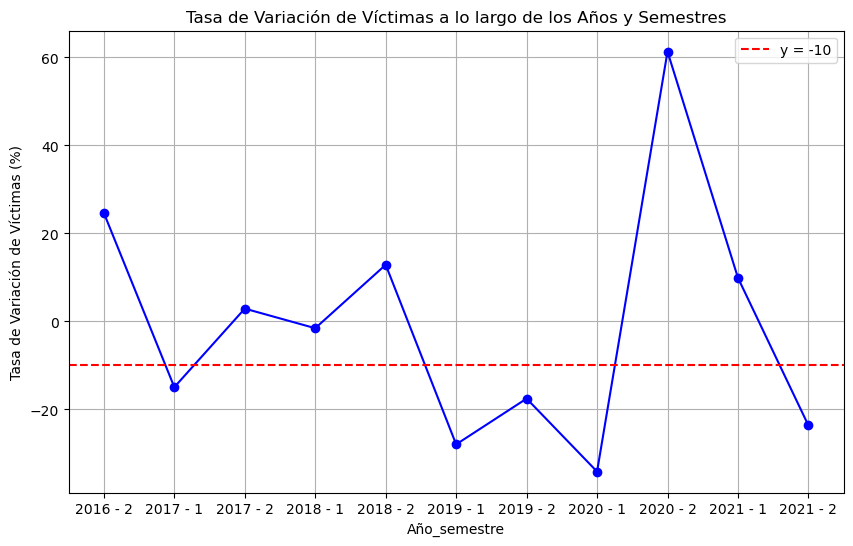

In [12]:
# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario

# Graficar la tasa de variación de las víctimas en función del año_semestre
plt.plot(df_anio_semestre["Anio_Semestre"], df_anio_semestre["tasa_variacion_victimas"], marker='o', linestyle='-', color='b')

# Agregar una línea recta en y = -10
plt.axhline(y=-10, color='r', linestyle='--', label='y = -10')

# Etiquetas y título
plt.xlabel("Año_semestre")
plt.ylabel("Tasa de Variación de Víctimas (%)")
plt.title("Tasa de Variación de Víctimas a lo largo de los Años y Semestres")

# Mostrar la leyenda
plt.legend()

# Mostrar la rejilla
plt.grid(True)

# Mostrar el gráfico
plt.show()

En este grafico podemos observar que a traves del tiempo el objetivo de disminuir un 10% la tasa con respecto al semestre anterior solo fue cumplida durante 5 semestres los cuales son los años 2017-1, 2019-1, 2019-2, 2020-1 y 2021-2. Ademas se ve un pico demaciado alto en el semestre 2020-2<br>
Esto se puede deber al covid 19 y el confinamiento

## KPI Nro 2

### Reducción del 7% en la cantidad de accidentes mortales de motociclistas en CABA en el último año en comparación con el año anterior

Para comenzar filtraremos solo las motos

In [13]:
df_homicidios_poblacion_moto = df_homicidios_poblacion[df_homicidios_poblacion.VICTIMA_x == 'moto']
df_homicidios_poblacion_moto.head()

,idHecho,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,TIPO_DE_CALLE,COMUNA,...,Latitud,VICTIMA_x,ACUSADO,ROL,SEXO,semestre,dia_semana_espanol,Rango Etario,Anio,Poblacion
0,2016-0001,1,2016-01-01,2016,1,1,2023-12-05 04:00:00,4,avenida,8,...,-34.687570,moto,auto,conductor,masculino,1,Viernes,Adulto Joven,2016,3059122
2,2016-0003,1,2016-01-03,2016,1,3,2023-12-05 07:00:00,7,avenida,1,...,-34.631894,moto,auto,conductor,masculino,1,Domingo,Adulto,2016,3059122
3,2016-0004,1,2016-01-10,2016,1,10,2023-12-05 00:00:00,0,avenida,8,...,-34.680930,moto,sd,conductor,masculino,1,Domingo,Adulto Joven,2016,3059122
4,2016-0005,1,2016-01-21,2016,1,21,2023-12-05 05:20:00,5,avenida,1,...,-34.622466,moto,pasajeros,conductor,masculino,1,Jueves,Adulto,2016,3059122
5,2016-0008,1,2016-01-24,2016,1,24,2023-12-05 18:30:00,18,avenida,8,...,-34.684759,moto,objeto fijo,conductor,masculino,1,Domingo,Adulto,2016,3059122


Agrupamos las columnas de interes para poder calcular la tasa

In [14]:
df_homicidios_moto_agrupado = df_homicidios_poblacion_moto.groupby(['Anio']).agg({'N_VICTIMAS': 'sum'}).reset_index()
df_homicidios_moto_agrupado

,Anio,N_VICTIMAS
0,2016,65
1,2017,56
2,2018,57
3,2019,50
4,2020,29
5,2021,46


Creamos una nueva columna para poder llevar el nro de victimas a la siguiente fila

In [15]:
df_homicidios_moto_agrupado['N_VICTIMAS_ANTERIOR'] = df_homicidios_moto_agrupado['N_VICTIMAS'].shift(1)
df_homicidios_moto_agrupado

,Anio,N_VICTIMAS,N_VICTIMAS_ANTERIOR
0,2016,65,NaN
1,2017,56,65.0
2,2018,57,56.0
3,2019,50,57.0
4,2020,29,50.0
5,2021,46,29.0


Calculamos la variacion de los accidentes en motocicletas 

In [16]:
# Redondear a dos decimales
df_homicidios_moto_agrupado["tasa_variacion_moto"] = ((df_homicidios_moto_agrupado["N_VICTIMAS"] - df_homicidios_moto_agrupado["N_VICTIMAS_ANTERIOR"]) / df_homicidios_moto_agrupado["N_VICTIMAS_ANTERIOR"]) * 100
df_homicidios_moto_agrupado["tasa_variacion_moto"] = df_homicidios_moto_agrupado["tasa_variacion_moto"].round(2)
df_homicidios_moto_agrupado

,Anio,N_VICTIMAS,N_VICTIMAS_ANTERIOR,tasa_variacion_moto
0,2016,65,NaN,NaN
1,2017,56,65.0,-13.85
2,2018,57,56.0,1.79
3,2019,50,57.0,-12.28
4,2020,29,50.0,-42.00
5,2021,46,29.0,58.62


Graficamos la variacion con respecto al año y adicionamos una linea roja para ver el cumplimiento del objetivo

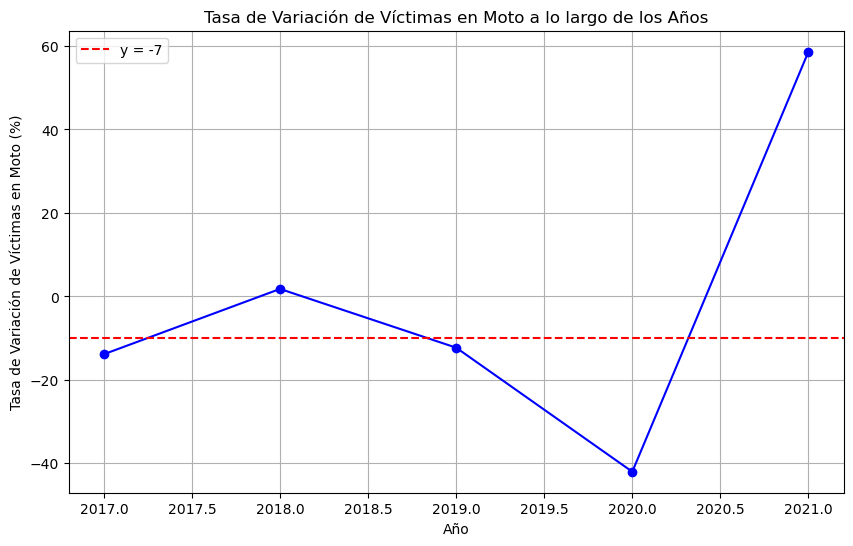

In [17]:
# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario

# Graficar la tasa de variación de las víctimas de moto en función del año
plt.plot(df_homicidios_moto_agrupado["Anio"], df_homicidios_moto_agrupado["tasa_variacion_moto"], marker='o', linestyle='-', color='b')

# Agregar una línea recta en y = -10
plt.axhline(y=-10, color='r', linestyle='--', label='y = -7')

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Tasa de Variación de Víctimas en Moto (%)")
plt.title("Tasa de Variación de Víctimas en Moto a lo largo de los Años")

# Mostrar la leyenda
plt.legend()

# Mostrar la rejilla
plt.grid(True)

# Mostrar el gráfico
plt.show()

- En el grafico se puede ver que el objetivo propuesto de reducir un 7% en los accidentes con con moto fueron cumplidos en los años 2017, 2019 y 2020
- El mayor año que s elogro una reduccion siginificativa fue durante el año 2020, si bine los otros años se redugieron estos se logro de forma dificil
- Un crecimiento de accidentes se puede ver en el año 2021 en el cual ocurrio un alto crecimeinto en la tasa de victimas en motos

## KPI Nro 3

### Reducción del 10% en la cantidad de accidentes mortales que ocurren en avenidas en CABA en comparacion con el año anterior

In [18]:
#Filtramos por tipo de calle = avenidas
df_homicidios_avenidas = df_homicidios_poblacion[df_homicidios_poblacion.TIPO_DE_CALLE == 'avenida']
# Agrupamos por anio
df_homicidios_agrupado_avenidas = df_homicidios_avenidas.groupby(['Anio']).agg({'N_VICTIMAS': 'sum'}).reset_index()
#empujamos hacia una fila adelante a la columna de victimas
df_homicidios_agrupado_avenidas['N_VICTIMAS_ANTERIOR'] = df_homicidios_agrupado_avenidas['N_VICTIMAS'].shift(1)
# calculamos la tasa de variacion
df_homicidios_agrupado_avenidas["tasa_variacion_avenida"] = ((df_homicidios_agrupado_avenidas["N_VICTIMAS"] - df_homicidios_agrupado_avenidas["N_VICTIMAS_ANTERIOR"]) / df_homicidios_agrupado_avenidas["N_VICTIMAS_ANTERIOR"]) * 100
# Redondeamos la tasa para una major vista
df_homicidios_agrupado_avenidas["tasa_variacion_avenida"] = df_homicidios_agrupado_avenidas["tasa_variacion_avenida"].round(2)
#mostramos el df
df_homicidios_agrupado_avenidas

,Anio,N_VICTIMAS,N_VICTIMAS_ANTERIOR,tasa_variacion_avenida
0,2016,91,NaN,NaN
1,2017,81,91.0,-10.99
2,2018,93,81.0,14.81
3,2019,64,93.0,-31.18
4,2020,52,64.0,-18.75
5,2021,61,52.0,17.31


Graficamos la columna tasa_variacion_avenida con respecto al anio en un grafico de linea

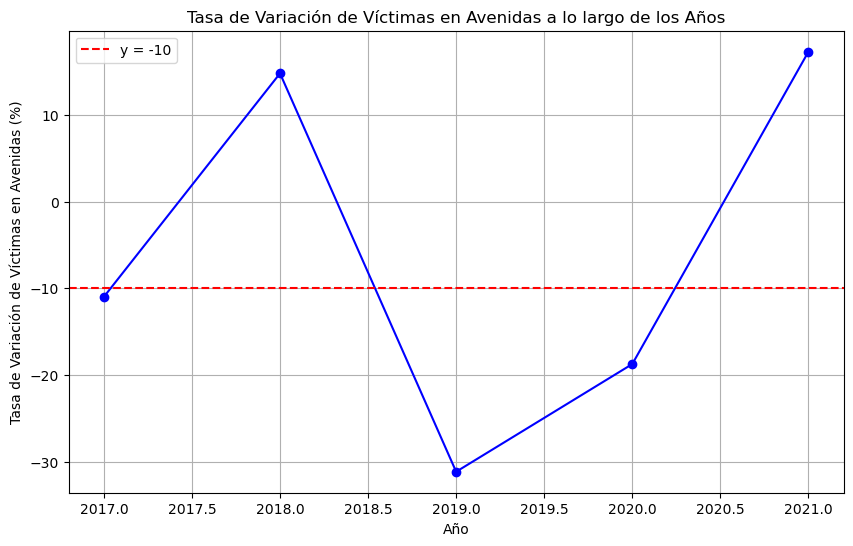

In [19]:
# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario

# Graficar la tasa de variación de las víctimas en avenidas función del año_
plt.plot(df_homicidios_agrupado_avenidas["Anio"], df_homicidios_agrupado_avenidas["tasa_variacion_avenida"], marker='o', linestyle='-', color='b')

# Agregar una línea recta en y = -10
plt.axhline(y=-10, color='r', linestyle='--', label='y = -10')

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Tasa de Variación de Víctimas en Avenidas (%)")
plt.title("Tasa de Variación de Víctimas en Avenidas a lo largo de los Años")

# Mostrar la leyenda
plt.legend()

# Mostrar la rejilla
plt.grid(True)

# Mostrar el gráfico
plt.show()

Se puede evidenciar que para los años 2017, 2019 y 2020 estos objetivo si se lograron cumplir por eso se considera una meta alcanzable para los proximos años<br>
Sin embargo, se puede notar un gran creciemiento en el año 2021 lo cual es un incremento muy alto y debe ser tratado las causas de este incremento